# <center> Визуализация на Python


# Домашнее задание
Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Для выполнения домашнего задания рассмотрим датасет по сериалу "Друзья".
https://www.kaggle.com/rezaghari/friends-series-dataset

In [2]:
df_friends= pd.read_csv('info/friends_episodes_v2.csv')
df_friends.head()

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
1,1994,1,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
2,1994,1,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
3,1994,1,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438
4,1994,1,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,8.1,4274


In [3]:
df_friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year_of_prod   235 non-null    int64  
 1   Season         235 non-null    int64  
 2   Episode_Title  235 non-null    object 
 3   Duration       235 non-null    int64  
 4   Summary        235 non-null    object 
 5   Director       235 non-null    object 
 6   Stars          235 non-null    float64
 7   Votes          235 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 14.8+ KB


In [4]:
df_friends.Stars.mean() #средняя оценка всего сериала

8.459574468085108

In [5]:
df_friends['Season'] = df_friends.Season.astype('str') #Переведем формат номера сезона в строковый тип

# Самые популярные сезоны по оценке пользователей
Построим столбчатую диаграмму распределения сезонов в зависимости от средней оценки сезона пользователями IMDB

In [6]:
top_episode = df_friends.groupby('Season').mean().sort_values('Stars', ascending=False).reset_index()
top_episode[['Season', 'Stars']]

,Season,Stars
0,10,8.677778
1,5,8.637500
2,6,8.496000
3,4,8.475000
4,2,8.458333
5,8,8.445833
6,7,8.437500
7,3,8.408000
8,1,8.317391
9,9,8.291667


Text(0.5, 1.0, 'Distribution of seasons by average rating IMDB')

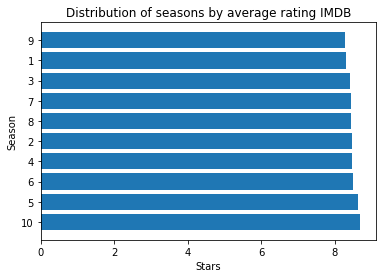

In [7]:
plt.barh(top_episode['Season'], top_episode['Stars'])
plt.xlabel('Stars')
plt.ylabel('Season')
plt.title('Distribution of seasons by average rating IMDB')

Для посроения диаграммы - сгруппировали данные по сезонам, и для каждого сезона посчитали средний рейтинг, отсортировали по убываю рейтинга.
Средние оценки всех сезоном примерно равны 8.5, что показывает популярности и хорошее мнение зрилетей. Самый популярный - 10  сезон.
Возможно это связано с тем, что 10 сезон должен был состоять из 24 эпизодов, как и все остальные, но у Дженнифер Энистон уже были другие предложения в кино, шоу сократили на шесть серий. Сезон был более продуманными в плане сценария, также многие фанаты сериалы отмечают, что концовка Друзей была хорошая.

## Топ 10 режесеров по количеству снятых им эпизиодов

In [8]:
info_director = df_friends[['Director', 'Stars']].groupby('Director').count().sort_values('Stars', ascending=False).head(10)
info_director.columns = ['number_of_filmed_episodes']
info_director.style.bar()

,number_of_filmed_episodes
Director,
Gary Halvorson,54
Kevin Bright,54
Michael Lembeck,24
Gail Mancuso,14
James Burrows,14
Peter Bonerz,12
Ben Weiss,10
David Schwimmer,10
Shelley Jensen,6


В данном случает просто стилизации таблицы достаточно, чтобы наглядно представить,что Гари Халворсон и Кевин Брайт сняли больше всего эпизодов. Интересно, что Дэвид Швиммер, актре который играл Роса, оказывается снял как реживер 10 эпизодов!

## Линейный график количества вышедших эпиходов в зависимотси от года

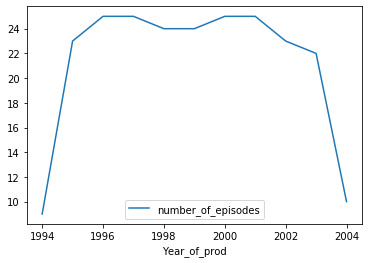

In [9]:
info_year = df_friends[['Year_of_prod','Episode_Title']].groupby('Year_of_prod').count()
info_year.columns = ['number_of_episodes']
info_year.plot()

Вывод: с 1995 по 2003 год выходило в среднем по 23 эпизода, первая серия первого сезона вышла 22 сентября 1994, поэтому до конца года успело выйти только 9 эпизодов, в 2004 году вышло всего 10 эпизодов.

## Гистограммы распределения численных признаков
Постоим распределение оценок зрителей Stars. Для этого построим distplot. 
Далее подробнее посмотрим на взаимосвязь двух численных признаков: оценка зрителей Stars и общее количество голосов в IMDB Votes.

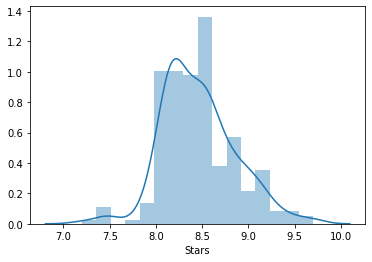

In [10]:
sns.distplot(df_friends.Stars)

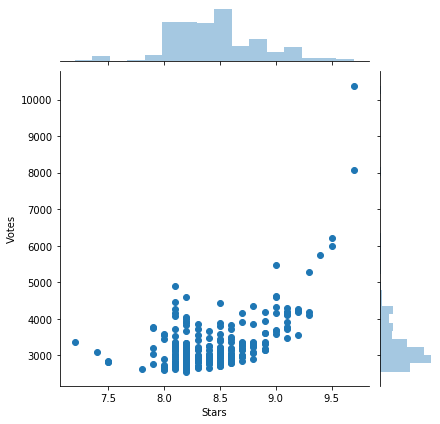

In [11]:
sns.jointplot(x='Stars', y='Votes', 
              data=df_friends, kind='scatter')

И количество оценок и рейтинг имеют нормальное распределение. По графику видно, что болшее количество голосов от 8.0 до 9.0, это подтверждает, что средний рейтинг равен 8.45.

## Рассмотрим различия оценок зрителей в зависимости от сезона

In [12]:
data = []

for Season in df_friends.Season.unique():
    data.append(
        go.Box(y=df_friends[df_friends.Season==Season].Stars, 
               name=Season)
    )
iplot(data, show_link = False)

Мы построили Box plot для оценок зрителей в зависимости от сезона. 
Заметно, что выбросов очень мало, в 4 сезоне есть выброс с оценкой 7.2, что все равно является большиим значением.
Самое большое значение медианы в 10 сезоне и равна 8.6. Максимальное значение оценки в 5 и 10 сезонах равно 9.7.
В целом можно сделать вывод о том, что сериал нравится зрителям, так как на протяжении всех сезонов, показатели оценки пользователей IMDB высокие.